In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):  
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-dataset2-1/2 col_five_minute_vehicle_counts_.csv
/kaggle/input/eda-dataset2-2/6am-3pm_five_minute_vehicle_counts_.csv


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/eda-dataset2-2/6am-3pm_five_minute_vehicle_counts_.csv')

# Function to combine date and start time from the time range
def combine_date_time(row):
    start_time = row['time'].split(' - ')[0]  # Extract the start time
    return f"{row['date']} {start_time}"

# Apply the function to create the datetime column
df['datetime'] = pd.to_datetime(df.apply(combine_date_time, axis=1), format='%d-%m-%Y %H:%M')

# Drop the original 'date' and 'time' columns
df = df.drop(columns=['date'])

df.set_index('datetime', inplace=True)
# Display the first few rows to verify the changes
df


,time,Total
datetime,,
2024-09-19 06:00:00,06:00 - 06:05,128
2024-09-19 06:05:00,06:05 - 06:10,148
2024-09-19 06:10:00,06:10 - 06:15,180
2024-09-19 06:15:00,06:15 - 06:20,148
2024-09-19 06:20:00,06:20 - 06:25,142
...,...,...
2024-09-29 14:35:00,14:35 - 14:40,173
2024-09-29 14:40:00,14:40 - 14:45,184
2024-09-29 14:45:00,14:45 - 14:50,189


In [4]:
df['minute'] = df.index.minute 
df['hour'] = df.index.hour 
df['day'] = df.index.day 
#df['minute']= df.index.minute 
df.shape

(1188, 5)

In [10]:
df

,time,Total,minute,hour,day
datetime,,,,,
2024-09-19 06:00:00,06:00 - 06:05,128,0,6,19
2024-09-19 06:05:00,06:05 - 06:10,148,5,6,19
2024-09-19 06:10:00,06:10 - 06:15,180,10,6,19
2024-09-19 06:15:00,06:15 - 06:20,148,15,6,19
2024-09-19 06:20:00,06:20 - 06:25,142,20,6,19
...,...,...,...,...,...
2024-09-29 14:35:00,14:35 - 14:40,173,35,14,29
2024-09-29 14:40:00,14:40 - 14:45,184,40,14,29
2024-09-29 14:45:00,14:45 - 14:50,189,45,14,29


In [5]:
df_19 = df.loc[df.index.date == pd.to_datetime('2024-09-19').date()]
df_20 = df.loc[df.index.date == pd.to_datetime('2024-09-20').date()]
df_21 = df.loc[df.index.date == pd.to_datetime('2024-09-21').date()]
df_22 = df.loc[df.index.date == pd.to_datetime('2024-09-22').date()]
df_23 = df.loc[df.index.date == pd.to_datetime('2024-09-23').date()]
df_24 = df.loc[df.index.date == pd.to_datetime('2024-09-24').date()]
df_25 = df.loc[df.index.date == pd.to_datetime('2024-09-25').date()]
df_26 = df.loc[df.index.date == pd.to_datetime('2024-09-26').date()]
df_27 = df.loc[df.index.date == pd.to_datetime('2024-09-27').date()]
df_28 = df.loc[df.index.date == pd.to_datetime('2024-09-27').date()]
df_29 = df.loc[df.index.date == pd.to_datetime('2024-09-29').date()]

In [6]:
df_19

,time,Total,minute,hour,day
datetime,,,,,
2024-09-19 06:00:00,06:00 - 06:05,128,0,6,19
2024-09-19 06:05:00,06:05 - 06:10,148,5,6,19
2024-09-19 06:10:00,06:10 - 06:15,180,10,6,19
2024-09-19 06:15:00,06:15 - 06:20,148,15,6,19
2024-09-19 06:20:00,06:20 - 06:25,142,20,6,19
...,...,...,...,...,...
2024-09-19 14:35:00,14:35 - 14:40,247,35,14,19
2024-09-19 14:40:00,14:40 - 14:45,182,40,14,19
2024-09-19 14:45:00,14:45 - 14:50,185,45,14,19


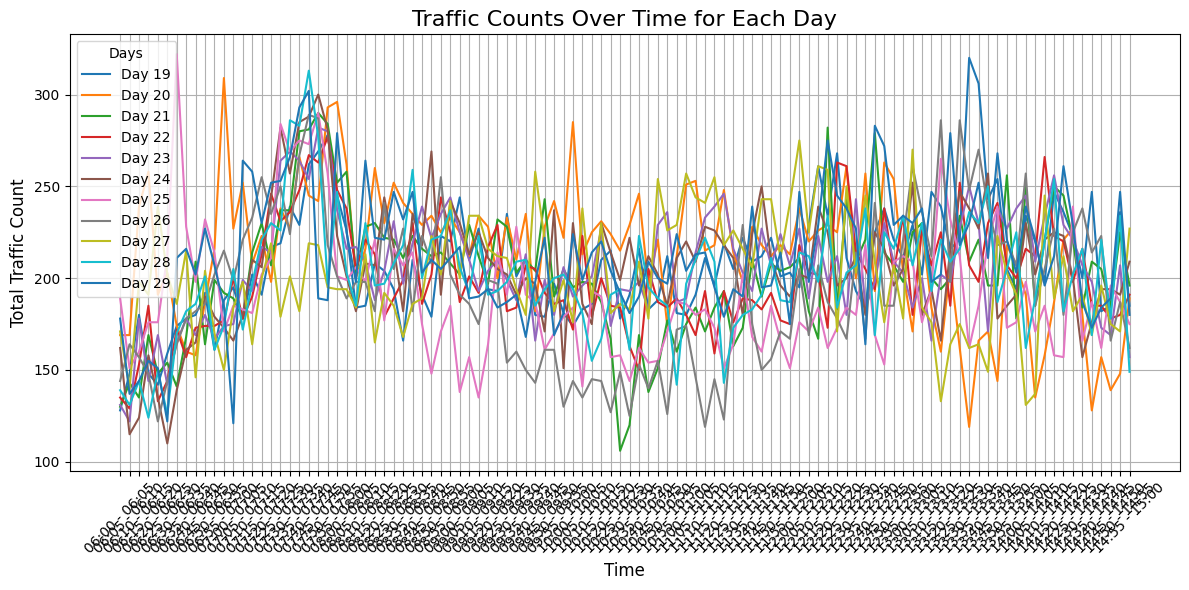

In [7]:
plt.figure(figsize=(12, 6))

# Loop through each unique day and plot
for day in df['day'].unique():
    day_data = df[df['day'] == day]  # Filter data for each day
    plt.plot(day_data['time'], day_data['Total'], label=f'Day {day}')  # Plot with time and total

# Adding labels, title, and legend
plt.title('Traffic Counts Over Time for Each Day', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Traffic Count', fontsize=12)
plt.legend(title='Days', fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


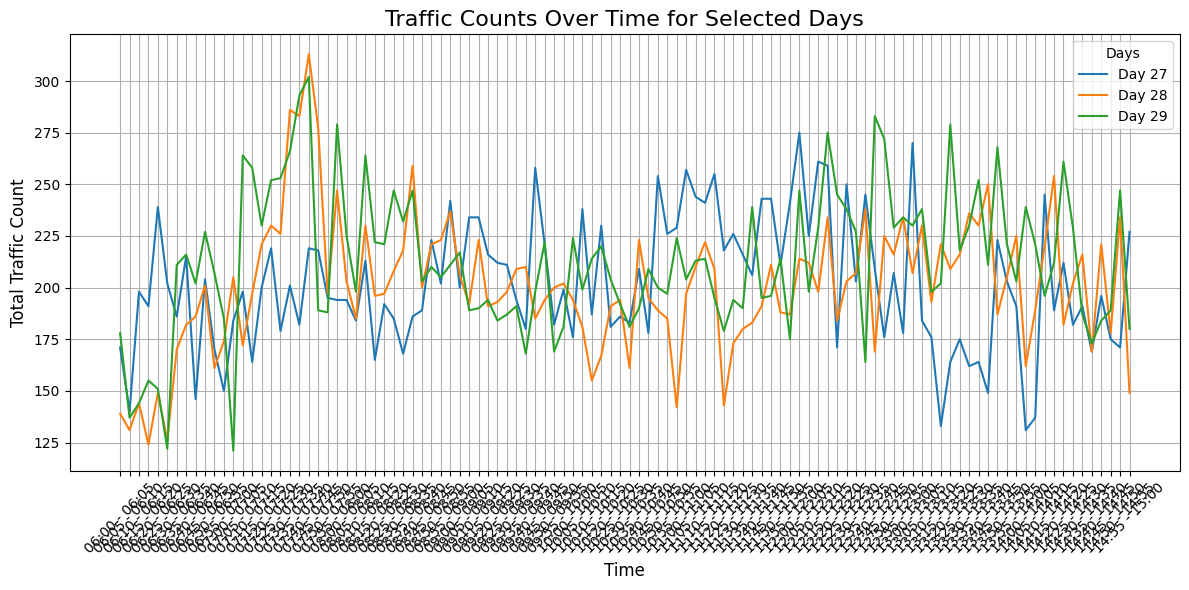

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Define the days you want to plot
selected_days = [27, 28, 29]

# Loop through each selected day and plot
for day in selected_days:
    day_data = df[df['day'] == day]  # Filter data for selected days
    plt.plot(day_data['time'], day_data['Total'], label=f'Day {day}')  # Plot with time and total

# Adding labels, title, and legend
plt.title('Traffic Counts Over Time for Selected Days', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Traffic Count', fontsize=12)
plt.legend(title='Days', fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.savefig('Time series pattern_27-29.png', format='png')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total', ylabel='Count'>

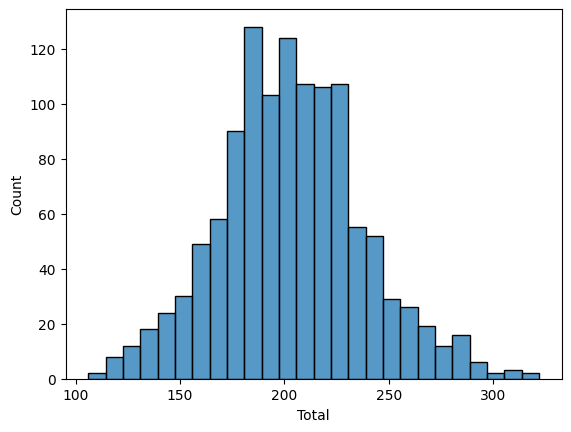

In [8]:
# frequency of the dataframe
sns.histplot(df, x = 'Total')

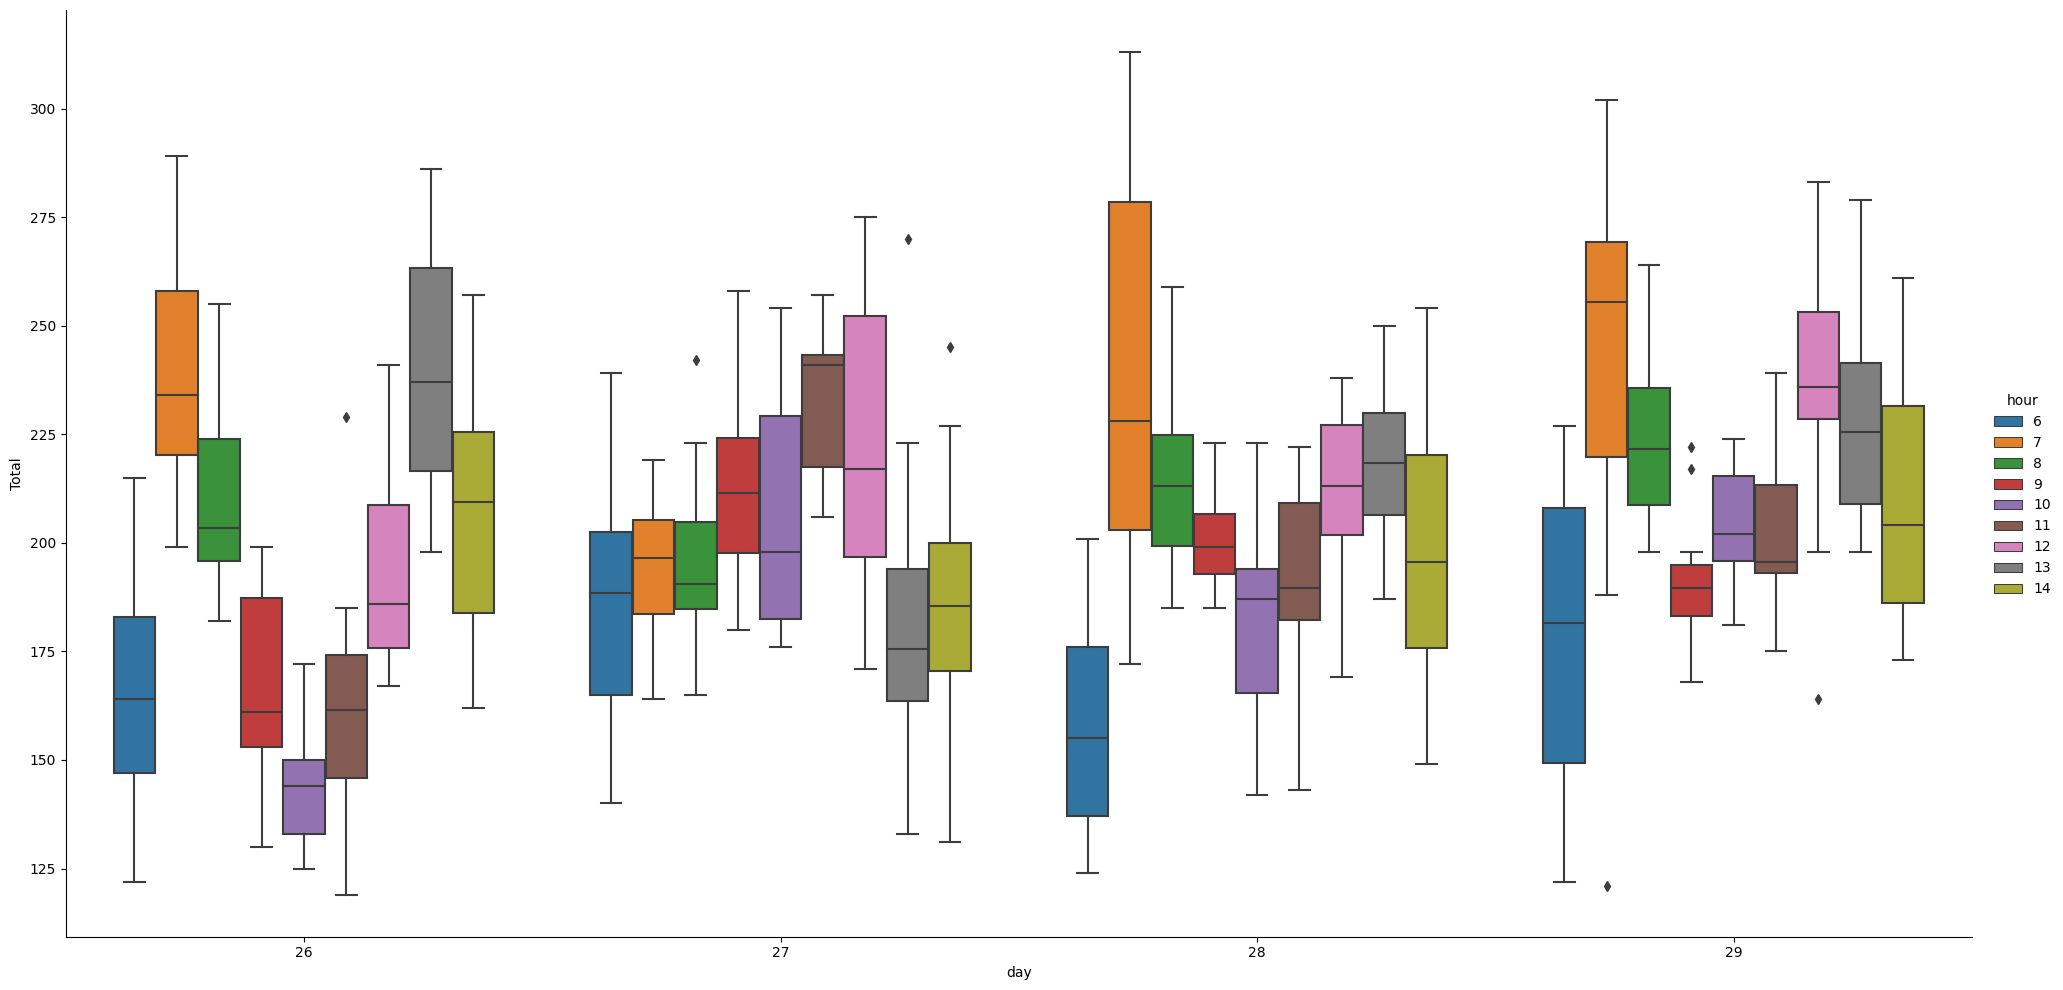

In [9]:
# daily and hourly variation of total traffic

filtered_df = df[df['day'].isin([26, 27, 28, 29])]
sns.catplot(
    data=filtered_df, 
    x='day', 
    y='Total', 
    kind='box',
    hue = 'hour',
    height=10,   # Height of each facet
    aspect=2     # Aspect ratio (width = height * aspect) 
)

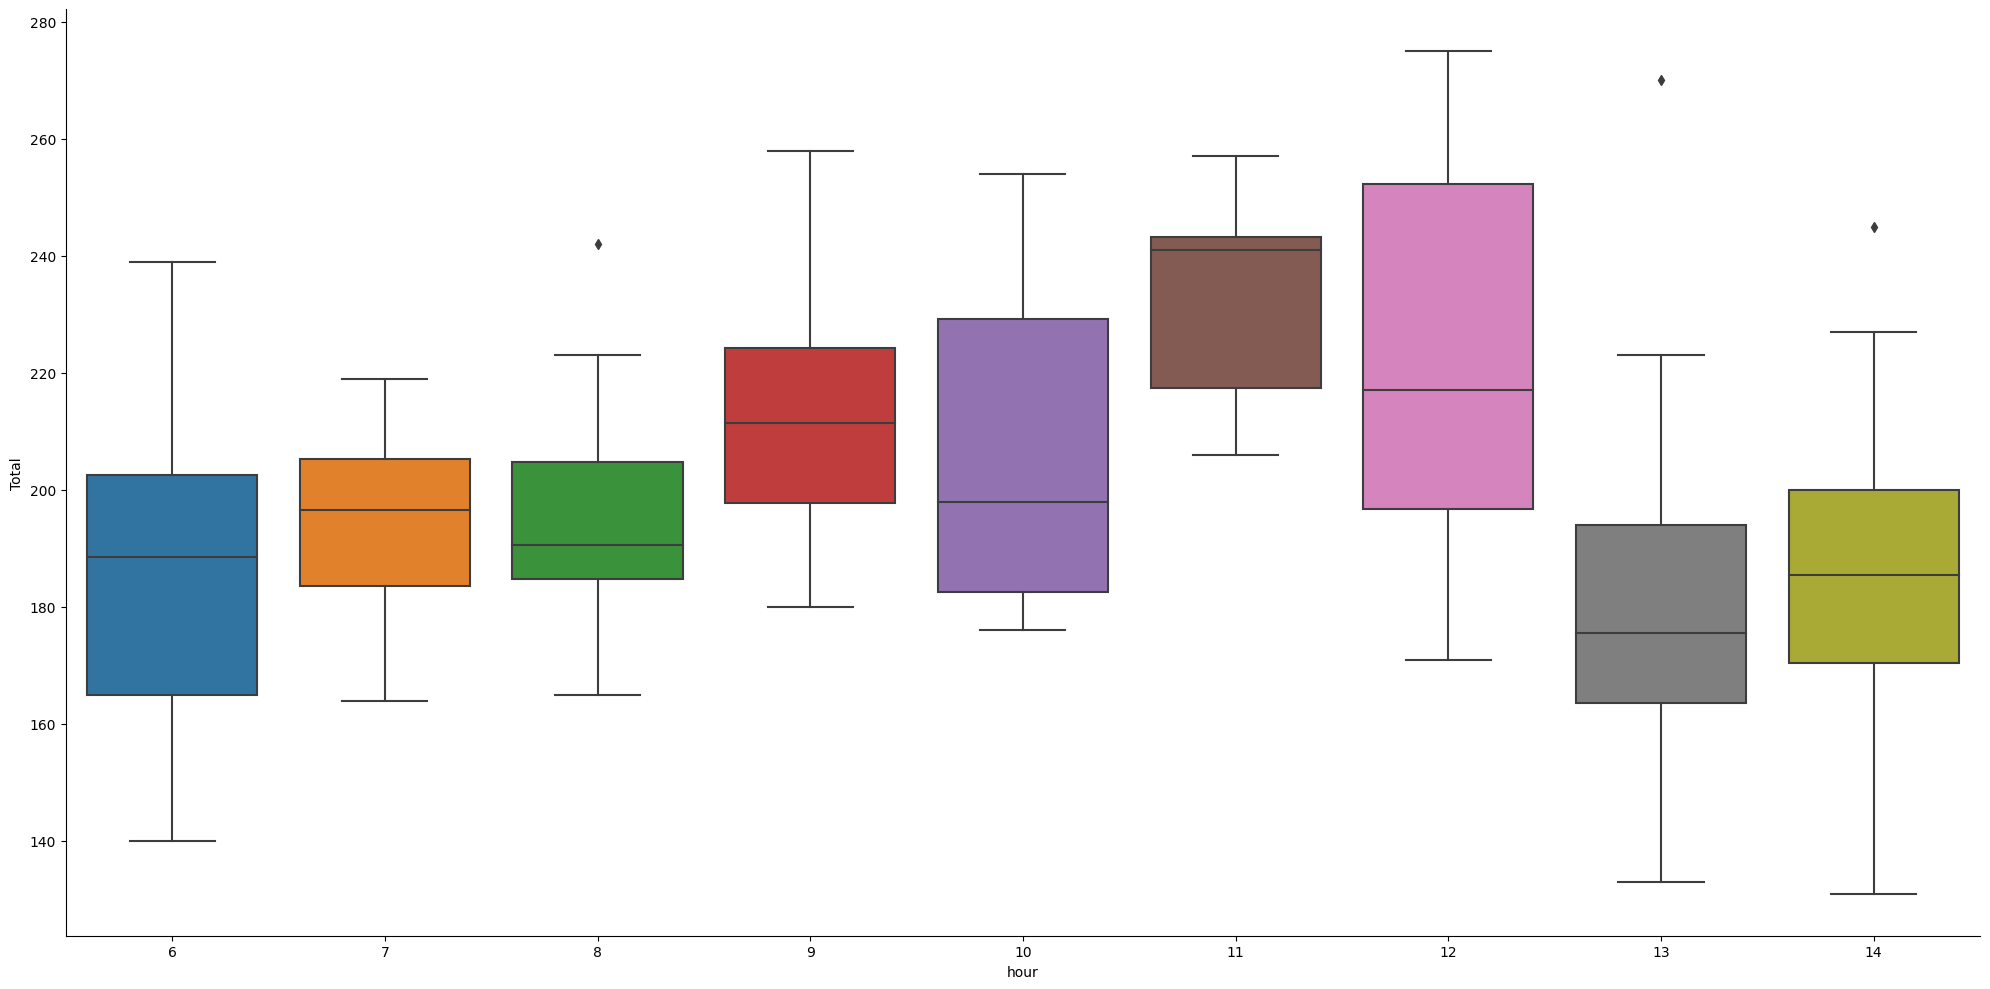

In [9]:
# hourly variation (individual day-28) of traffic
sns.catplot(
    data=df_28, 
    x='hour', 
    y='Total', 
    kind='box',
  #  hue = 'hour',
    height=10,   # Height of each facet
    aspect=2     # Aspect ratio (width = height * aspect)
)

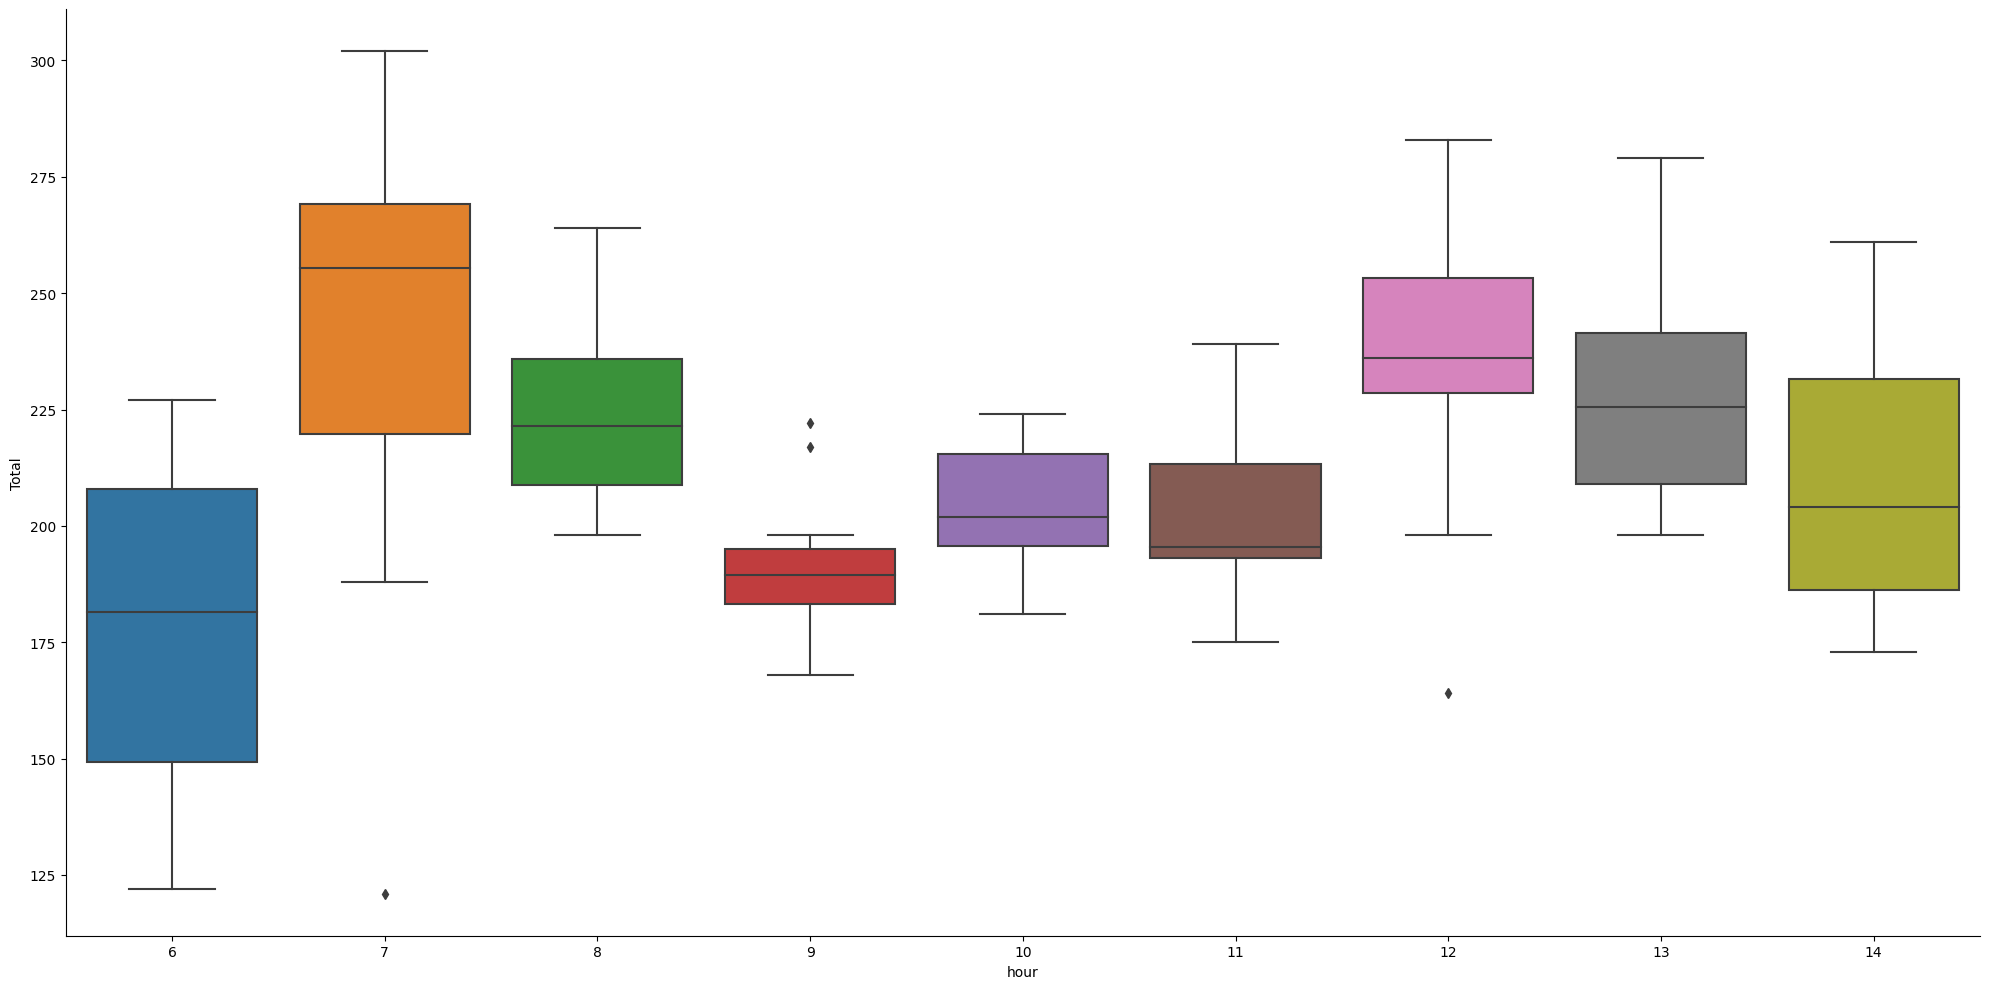

In [10]:
# hourly variation (individual day-29) of traffic
sns.catplot(
    data=df_29, 
    x='hour', 
    y='Total', 
    kind='box',
  #  hue = 'hour',
    height=10,   # Height of each facet
    aspect=2     # Aspect ratio (width = height * aspect)
) 

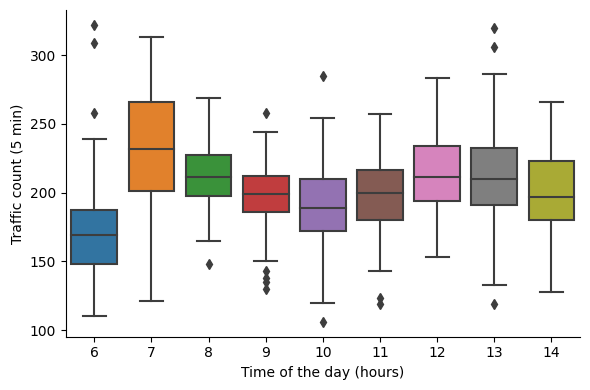

In [11]:
# hourly variation (full dataset) of traffic
sns.catplot(
    data=df, 
    x='hour', 
    y='Total', 
    kind='box',
    height=4,   # Height of each facet
    aspect=1.5     # Aspect ratio (width = height * aspect)
)

# Set axis labels
plt.xlabel("Time of the day (hours)")
plt.ylabel("Traffic count (5 min)")
plt.savefig('Hourly box plot of entire dataset2.png', format='png')
plt.show()

# Empirical Mode Decomposition

In [12]:
pip install EMD-signal 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Entire emd code 

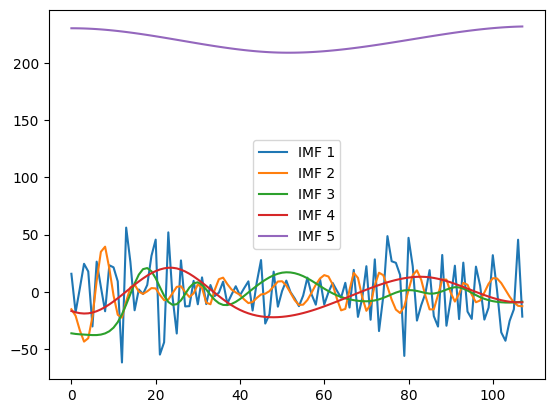

In [13]:
import pandas as pd
from PyEMD import EMD 
import numpy as np

# Load the dataset
traffic_data = pd.read_csv('/kaggle/input/eda-dataset2-2/6am-3pm_five_minute_vehicle_counts_.csv')

# Convert 'date' and 'time' into a single datetime index
traffic_data['datetime'] = traffic_data['date'] + ' ' + traffic_data['time'].str.split(' - ').str[0]
traffic_data['datetime'] = pd.to_datetime(traffic_data['datetime'], format='%d-%m-%Y %H:%M')
traffic_data = traffic_data.set_index('datetime')

# Group data by day
daily_groups = traffic_data.groupby(traffic_data.index.date)

# Initialize a list to store reconstructed data
reconstructed_data = []
# Apply EMD to each day's data
for day, group in daily_groups:
    daily_total = group['Total'].values 
    #emd = EMD()
    emd = EMD(max_imf=9)
    IMFs = emd(daily_total)
    # Exclude first high-frequency IMFs (e.g., IMF 0)
    reconstructed_signal = np.sum(IMFs[1:], axis=0) 
    #residual = daily_total - reconstructed_signal

    # Add the reconstructed signal to the group's dataframe
    group = group.copy()
    group['Reconstructed_Total'] = reconstructed_signal
    reconstructed_data.append(group) 

# Combine all days' reconstructed data
reconstructed_df = pd.concat(reconstructed_data)
reconstructed_df.reset_index(inplace=True)

import matplotlib.pyplot as plt
for i, imf in enumerate(IMFs):
    plt.plot(imf, label=f'IMF {i+1}') 
plt.legend()
plt.show()



- reserveing original vs reconstructed plot 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(daily_total, label='Original Signal')
plt.plot(reconstructed_signal, label='Reconstructed Signal')
plt.legend()
plt.show()  

- generate csv of reconstructed_df of entire dataset
- exlcuded 1st IMF

In [26]:
reconstructed_df = reconstructed_df.drop(['datetime', 'Total'], axis=1)
# Convert the 'Reconstructed_Total' column to integers
reconstructed_df['Reconstructed_Total'] = reconstructed_df['Reconstructed_Total'].astype(int)
reconstructed_df.to_csv("Reconstructed_Total.csv", index=False)

## Analysis with last day(29-09-2024) data 

/usr/local/lib/python3.10/dist-packages/PyEMD/EMD.py:685: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  local_max_val = S[indmax]
/usr/local/lib/python3.10/dist-packages/PyEMD/EMD.py:687: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  local_min_val = S[indmin]
/usr/local/lib/python3.10/dist-packages/PyEMD/EMD.py:363: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if S[0] < S[ind_max[0]]:
/usr/local/lib/python3.10/dist-packages/PyEMD/E

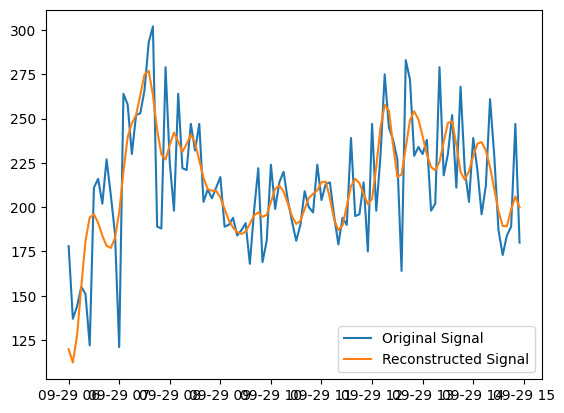

In [21]:
emd = EMD()
IMFs_29 = emd(df_29['Total']) 

#reconstructed_signal_29_last = np.sum(IMFs_29[:-1], axis=0) 
#reconstructed_signal_29 = np.sum(IMFs_29[4:], axis=0) + IMFs[0]
reconstructed_signal_29 = np.sum(IMFs_29[2:], axis=0) 

#df_29['Reconstructed Total_29_last']= reconstructed_signal_29_last
df_29['Reconstructed Total_29']= reconstructed_signal_29

df_29.head(25)

import matplotlib.pyplot as plt
plt.plot(df_29['Total'], label='Original Signal')
plt.plot(df_29['Reconstructed Total_29'], label='Reconstructed Signal') 
#plt.plot(df_29['Reconstructed Total_29_last'], label='Reconstructed Signal_last') 
plt.legend()
plt.show()  

How EMD Suppresses Outliers:
1. Decomposition into IMFs:

- The raw traffic flow signal (Total) is decomposed into a set of Intrinsic Mode Functions (IMFs) using EMD.
- High-frequency IMFs typically capture noise and abrupt variations, including outliers.
2. Reconstruction of the Signal:

- By summing all IMFs, the signal is reconstructed.
- If specific IMFs (e.g., the highest frequency ones) are excluded during reconstruction, the noise and outliers are suppressed.

Observations:
The reconstructed signal closely follows the original, suggesting that all IMFs were summed during reconstruction.
High-frequency noise or outliers may still be present if the highest-frequency IMFs (noise-dominant components) were not excluded during reconstruction.

## Plotting Individual IMFs

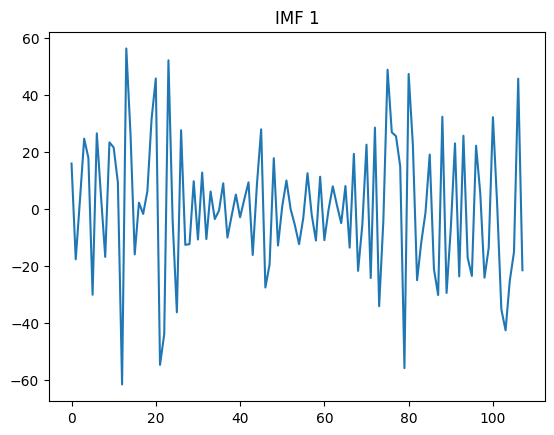

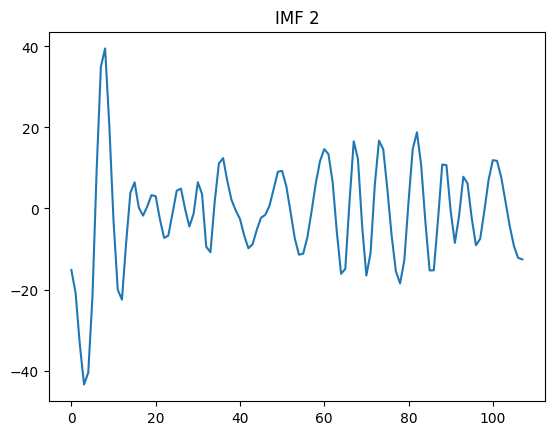

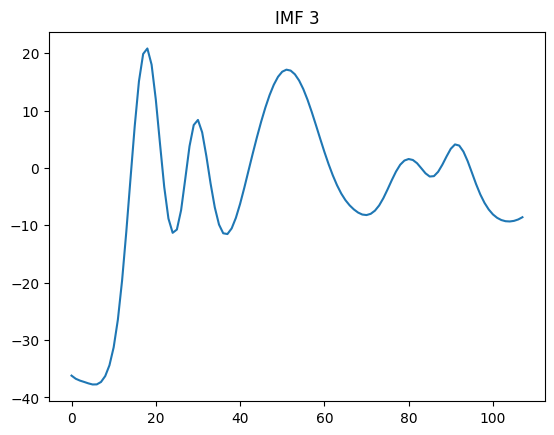

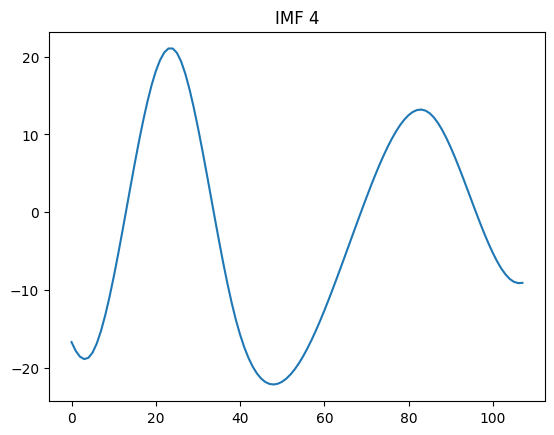

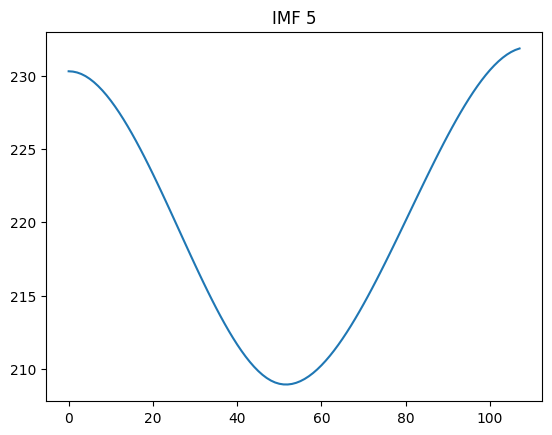

In [22]:
for i, imf in enumerate(IMFs):
    plt.figure()
    plt.plot(imf)
    plt.title(f'IMF {i+1}')
    plt.show() 


## Applying Hurst Exponent to IMFs

In [14]:
pip install hurst 

Note: you may need to restart the kernel to use updated packages.


- Applied hurst exponent to individual day

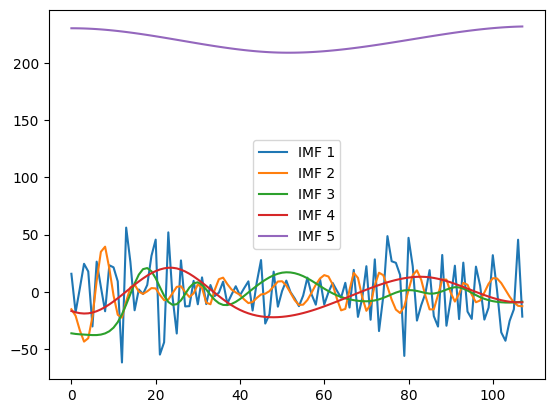

In [16]:
import pandas as pd
from PyEMD import EMD
import numpy as np
from hurst import compute_Hc
import matplotlib.pyplot as plt

# Load the dataset
traffic_data = pd.read_csv('/kaggle/input/eda-dataset2-2/6am-3pm_five_minute_vehicle_counts_.csv')

# Convert 'date' and 'time' into a single datetime index
traffic_data['datetime'] = traffic_data['date'] + ' ' + traffic_data['time'].str.split(' - ').str[0]
traffic_data['datetime'] = pd.to_datetime(traffic_data['datetime'], format='%d-%m-%Y %H:%M')
traffic_data = traffic_data.set_index('datetime')

# Group data by day
daily_groups = traffic_data.groupby(traffic_data.index.date)

# Initialize lists to store reconstructed data and Hurst Exponents
reconstructed_data = []
hurst_results = []

# Apply EMD to each day's data
for day, group in daily_groups:
    daily_total = group['Total'].values
    emd = EMD(max_imf=6) 
    IMFs = emd(daily_total)
    
    # Calculate Hurst Exponent for each IMF
    for i, imf in enumerate(IMFs):
        H, c, data = compute_Hc(imf, kind='random_walk')
        hurst_results.append({"Date": day, "IMF": i + 1, "Hurst Exponent": H})
    
    # Exclude first high-frequency IMFs (e.g., IMF 0)
    reconstructed_signal = np.sum(IMFs[1:], axis=0) 
    
    # Add the reconstructed signal to the group's dataframe
    group = group.copy()
    group['Reconstructed_Total'] = reconstructed_signal
    reconstructed_data.append(group)

# Combine all days' reconstructed data
reconstructed_df = pd.concat(reconstructed_data)
reconstructed_df.reset_index(inplace=True)

# Convert Hurst results to DataFrame for analysis
hurst_df = pd.DataFrame(hurst_results)

# Save Hurst Exponent results
hurst_df.to_csv("Hurst_Exponent_IMFs.csv", index=False)

# Visualize IMFs
for i, imf in enumerate(IMFs):
    plt.plot(imf, label=f'IMF {i+1}')  
plt.legend()
plt.show()

# Save the reconstructed data
reconstructed_df.to_csv("Reconstructed_Data.csv", index=False)


- Apply hurst to entire dataset

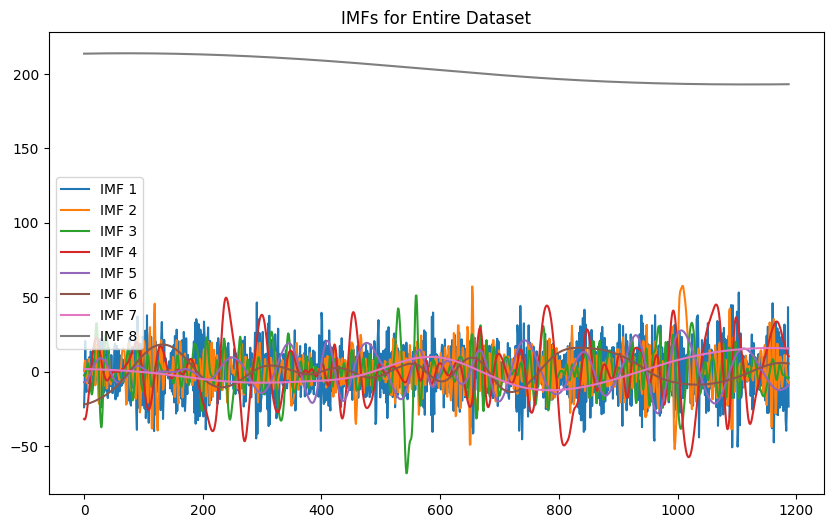

Hurst Exponent and reconstructed data processing completed.


In [17]:
import pandas as pd
from PyEMD import EMD
import numpy as np
from hurst import compute_Hc
import matplotlib.pyplot as plt

# Load the dataset
traffic_data = pd.read_csv('/kaggle/input/eda-dataset2-2/6am-3pm_five_minute_vehicle_counts_.csv')

# Convert 'date' and 'time' into a single datetime index
traffic_data['datetime'] = traffic_data['date'] + ' ' + traffic_data['time'].str.split(' - ').str[0]
traffic_data['datetime'] = pd.to_datetime(traffic_data['datetime'], format='%d-%m-%Y %H:%M')
traffic_data = traffic_data.set_index('datetime')

# Extract the 'Total' column as a single time series
total_traffic = traffic_data['Total'].values

# Apply EMD to the entire dataset
emd = EMD(max_imf=6)  # Adjust the max number of IMFs if needed
IMFs = emd(total_traffic)

# Initialize a list to store Hurst Exponent results
hurst_results = []

# Calculate Hurst Exponent for each IMF
for i, imf in enumerate(IMFs):
    H, c, data = compute_Hc(imf, kind='random_walk')  # You can change 'kind' if needed
    hurst_results.append({"IMF": i + 1, "Hurst Exponent": H})

# Convert Hurst results to a DataFrame
hurst_df = pd.DataFrame(hurst_results)

# Save Hurst Exponent results to a CSV file
#hurst_df.to_csv("Hurst_Exponent_FullDataset_IMFs.csv", index=False)

# Plot all IMFs for the entire dataset
plt.figure(figsize=(10, 6))
for i, imf in enumerate(IMFs):
    plt.plot(imf, label=f'IMF {i+1}')
plt.title("IMFs for Entire Dataset")
plt.legend()
plt.show()

# Save the reconstructed data if needed
reconstructed_signal = np.sum(IMFs[1:], axis=0)  # Exclude high-frequency IMF if desired
traffic_data['Reconstructed_Total'] = reconstructed_signal
#traffic_data.to_csv("Reconstructed_FullDataset.csv", index=True)

print("Hurst Exponent and reconstructed data processing completed.") 


In [35]:
hurst_df 

,IMF,Hurst Exponent
0,1,0.134866
1,2,0.231429
2,3,0.226617
3,4,0.076218
4,5,-0.067403
5,6,-0.052940
6,7,-0.187809
7,8,-0.166933


- Using Rescaled range Hurst exponent

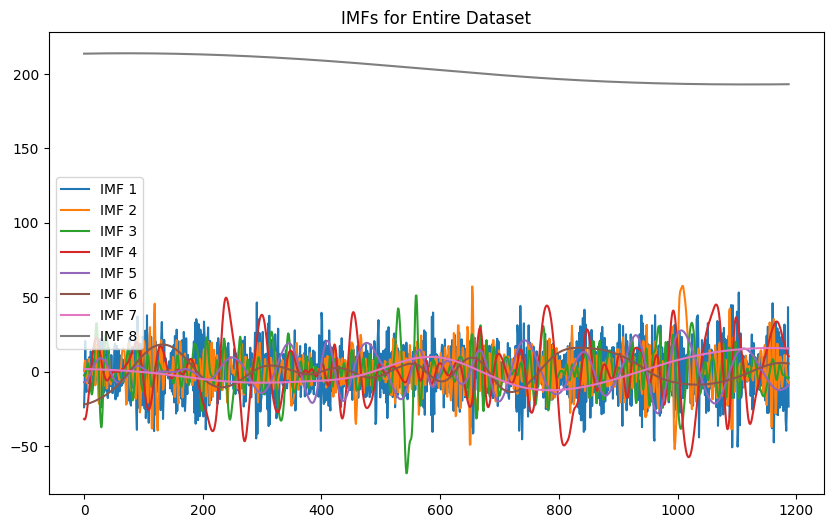

Hurst Exponent and reconstructed data processing completed.


In [15]:
import pandas as pd
from PyEMD import EMD
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Hurst Exponent using Rescaled Range Analysis
def hurst_exponent_rs(series):
    """
    Compute the Hurst exponent using Rescaled Range Analysis (R/S analysis).
    :param series: Input time series (1D array-like).
    :return: Hurst exponent.
    """
    N = len(series)
    max_lag = min(20, N // 2)  # Maximum lag for R/S computation
    rs_values = []
    lags = []

    for lag in range(2, max_lag):
        segments = N // lag
        rs_list = []

        for i in range(segments):
            segment = series[i * lag:(i + 1) * lag]
            mean = np.mean(segment)
            cum_deviation = np.cumsum(segment - mean)
            R = np.max(cum_deviation) - np.min(cum_deviation)
            S = np.std(segment, ddof=1)
            if S > 0:  # Avoid division by zero
                rs_list.append(R / S)

        if rs_list:
            rs_values.append(np.mean(rs_list))
            lags.append(lag)

    # Log-log regression for Hurst Exponent
    lags = np.log10(lags)
    rs_values = np.log10(rs_values)
    H, _ = np.polyfit(lags, rs_values, 1)

    return H

# Load the dataset
traffic_data = pd.read_csv('/kaggle/input/eda-dataset2-2/6am-3pm_five_minute_vehicle_counts_.csv')

# Convert 'date' and 'time' into a single datetime index
traffic_data['datetime'] = traffic_data['date'] + ' ' + traffic_data['time'].str.split(' - ').str[0]
traffic_data['datetime'] = pd.to_datetime(traffic_data['datetime'], format='%d-%m-%Y %H:%M')
traffic_data = traffic_data.set_index('datetime')

# Extract the 'Total' column as a single time series
total_traffic = traffic_data['Total'].values

# Apply EMD to the entire dataset
emd = EMD(max_imf=6)  # Adjust the max number of IMFs if needed
IMFs = emd(total_traffic)

# Initialize a list to store Hurst Exponent results
hurst_results = []

# Calculate Hurst Exponent for each IMF using Rescaled Range Analysis
for i, imf in enumerate(IMFs):
    H = hurst_exponent_rs(imf)
    hurst_results.append({"IMF": i + 1, "Hurst Exponent": H})

# Convert Hurst results to a DataFrame
hurst_df = pd.DataFrame(hurst_results)

# Save Hurst Exponent results to a CSV file
hurst_df.to_csv("Hurst_Exponent_RS_Analysis.csv", index=False)

# Plot all IMFs for the entire dataset
plt.figure(figsize=(10, 6))
for i, imf in enumerate(IMFs):
    plt.plot(imf, label=f'IMF {i+1}')
plt.title("IMFs for Entire Dataset")
plt.legend()
plt.show()

# Save the reconstructed data if needed
reconstructed_signal = np.sum(IMFs[1:], axis=0)  # Exclude high-frequency IMF if desired
traffic_data['Reconstructed_Total'] = reconstructed_signal
traffic_data.to_csv("Reconstructed_FullDataset.csv", index=True)

print("Hurst Exponent and reconstructed data processing completed.")

In [16]:
hurst_df 

,IMF,Hurst Exponent
0,1,0.583736
1,2,0.815829
2,3,1.045080
3,4,1.085037
4,5,1.083477
5,6,1.085267
6,7,1.088272
7,8,1.089505


- Plot IMFs 2 column wise

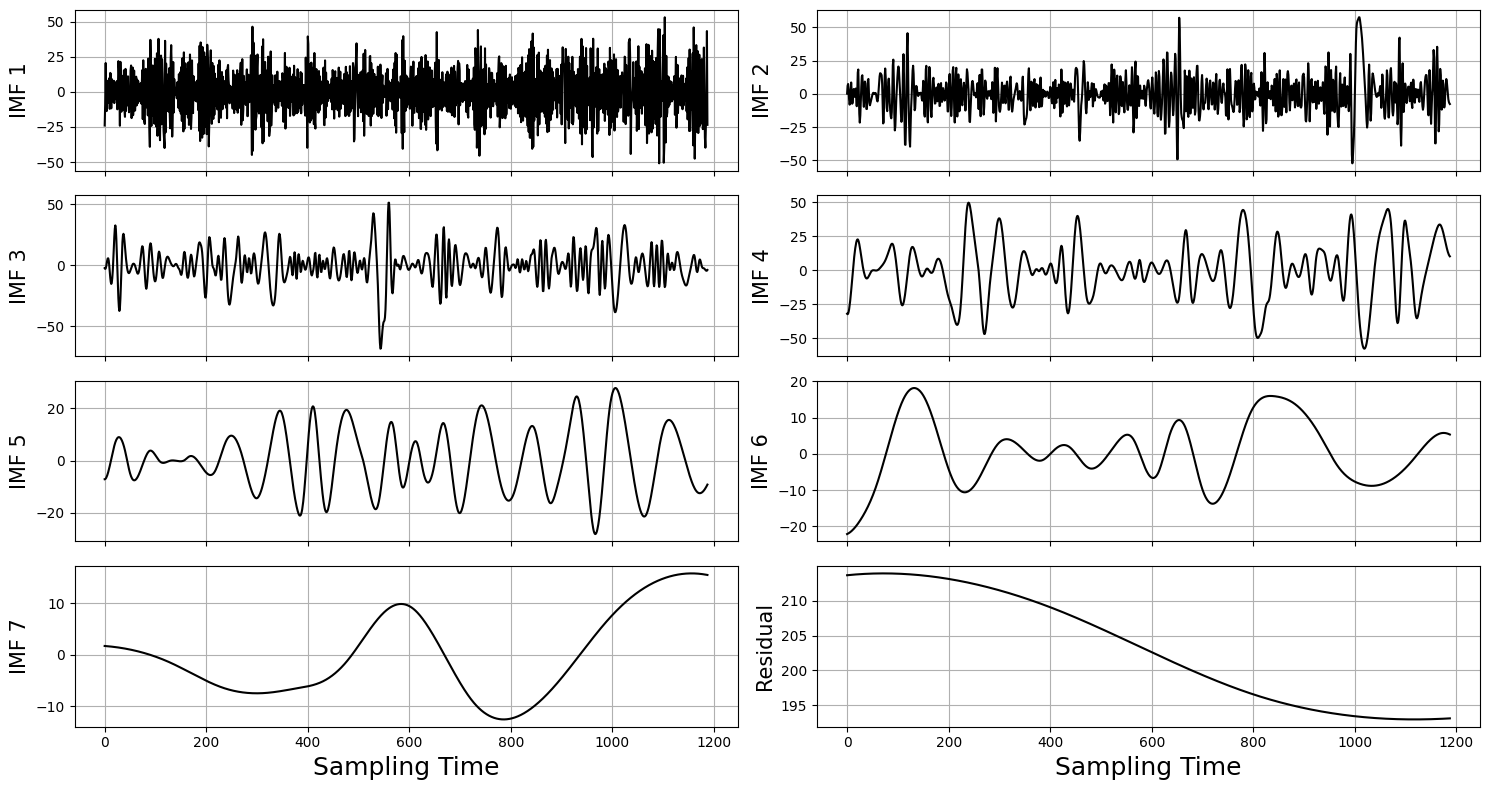

In [17]:
# Plot IMFs in a 2-column layout
fig, axes = plt.subplots(4, 2, figsize=(15, 8), sharex=True)  # 4 rows, 2 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, imf in enumerate(IMFs):
    axes[i].plot(imf, color='black')
    # Rename IMF 8 as "Residual"
    if i == 7:
        axes[i].set_ylabel("Residual", fontsize=15)
    else:
        axes[i].set_ylabel(f"IMF {i + 1}", fontsize=15)  # Set IMF name as the y-axis label
    axes[i].grid(True)

# Add x-axis label only to the last row
last_row_indices = [6, 7]  # Indices of the last row in a 2-column layout (4 rows total)
for i in last_row_indices:
    axes[i].set_xlabel("Sampling Time", fontsize=18)

# Hide any unused subplots if the number of IMFs is less than 8
for i in range(len(IMFs), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout() 
plt.savefig('IMFs_corrected.png', format='png') 
plt.show()

In [29]:
traffic_data 

,date,time,Total,Reconstructed_Total
datetime,,,,
2024-09-19 06:00:00,19-09-2024,06:00 - 06:05,128,151.993463
2024-09-19 06:05:00,19-09-2024,06:05 - 06:10,148,156.975404
2024-09-19 06:10:00,19-09-2024,06:10 - 06:15,180,159.425527
2024-09-19 06:15:00,19-09-2024,06:15 - 06:20,148,157.707560
2024-09-19 06:20:00,19-09-2024,06:20 - 06:25,142,155.690201
...,...,...,...,...
2024-09-29 14:35:00,29-09-2024,14:35 - 14:40,173,212.781398
2024-09-29 14:40:00,29-09-2024,14:40 - 14:45,184,207.914644
2024-09-29 14:45:00,29-09-2024,14:45 - 14:50,189,205.023095


- Original Vs Reconstructed Data plot

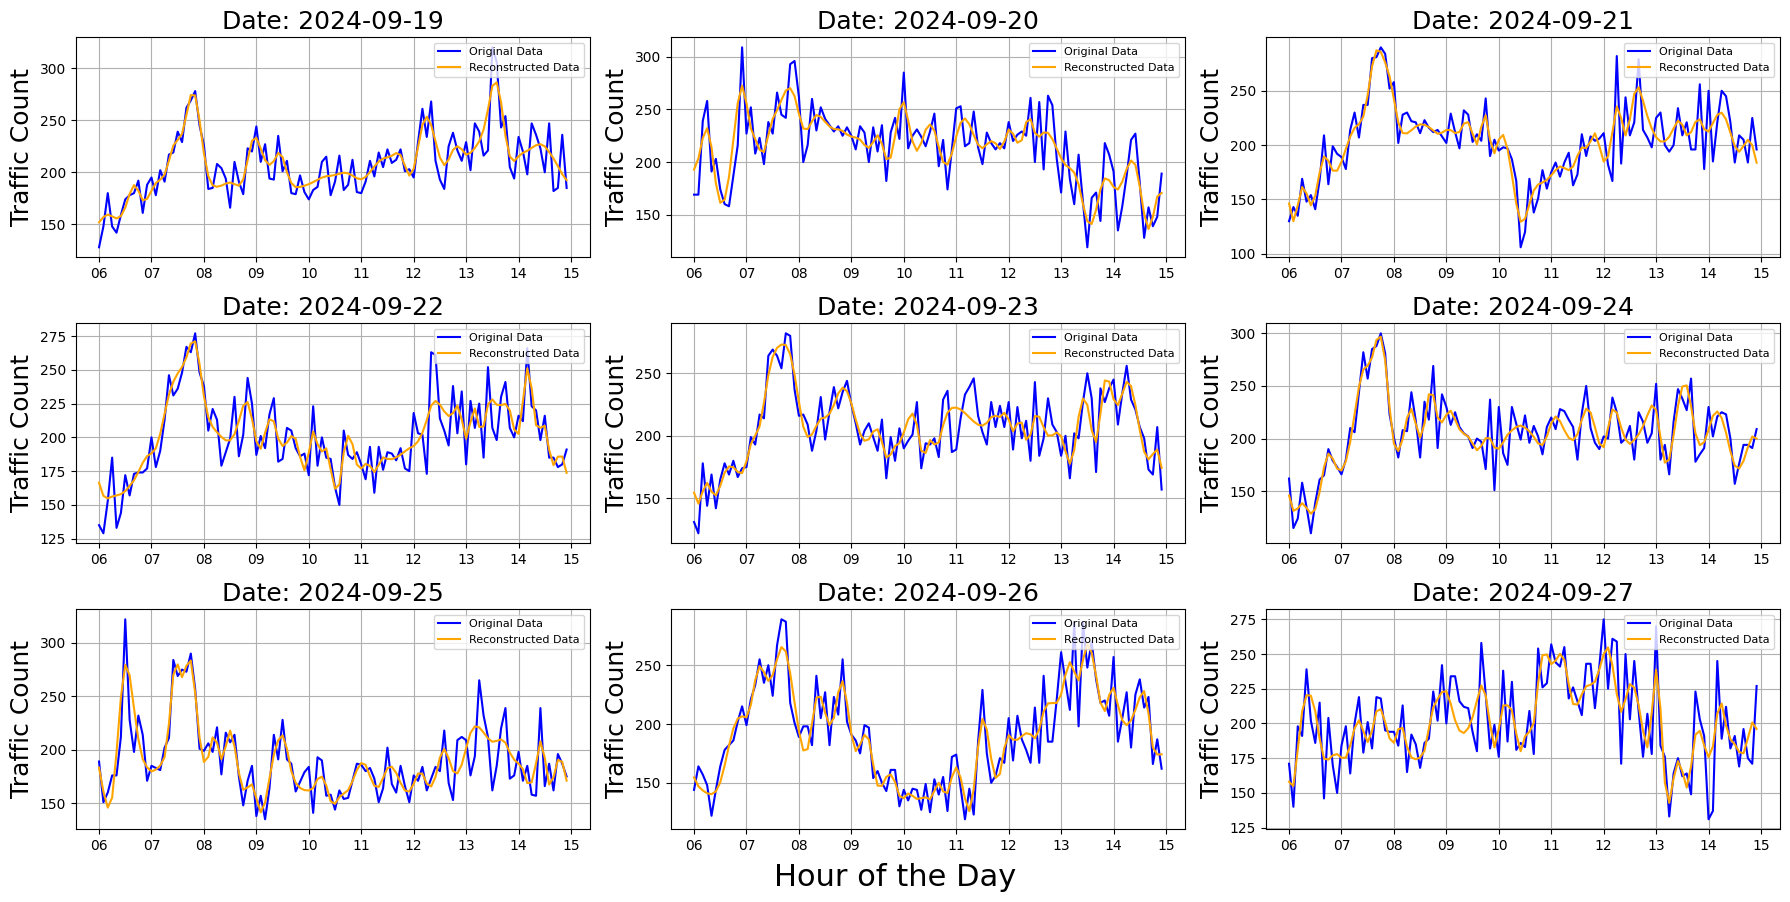

In [24]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Group data by day using the 'datetime' index
traffic_data['date'] = traffic_data.index.date  # Extract date from the datetime index
daily_groups = traffic_data.groupby('date')

# Filter out the dates 2024-09-28 and 2024-09-29
excluded_dates = [pd.to_datetime('2024-09-28').date(), pd.to_datetime('2024-09-29').date()]
filtered_groups = {day: group for day, group in daily_groups if day not in excluded_dates}

# Create subplots: 3-column layout
n_days = len(filtered_groups)
n_cols = 3  # Number of columns
n_rows = (n_days + n_cols - 1) // n_cols  # Compute number of rows dynamically
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3), sharex=False)
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Iterate over each day's group and plot
for ax, (day, group) in zip(axes, filtered_groups.items()):
    ax.plot(group.index, group['Total'], label='Original Data', color='blue')
    ax.plot(group.index, group['Reconstructed_Total'], label='Reconstructed Data', color='orange')
    ax.set_title(f'Date: {day}', fontsize=18)
    ax.set_ylabel('Traffic Count', fontsize=18)
    ax.grid(True)
    ax.legend(fontsize=8, loc='upper right')  # Position the legend to avoid overlap
    # Format x-axis to show only the hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# Hide unused subplots if any
for i in range(len(filtered_groups), len(axes)):
    axes[i].axis('off')

# Add a common x-axis label below the figure
fig.text(0.5, 0.01, 'Hour of the Day', ha='center', fontsize=22)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for the x-axis label
plt.savefig('Original Vs Reconstructed Data.png', format='png')
plt.show() 